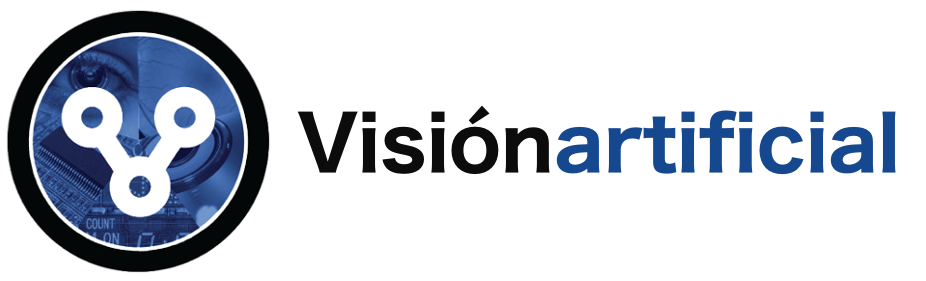

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<h1 style="font-size:30px;">Limiares</h1>

Unha das operacións máis importantes e fundamentais nos procesos de visión artificial é o limiar de imaxes. A miúdo, úsase para crear imaxes binarias que logo se poden empregar polas seguintes etapas no proceso. Neste caderno aprenderás a usar dous tipos de técnicas de limiar.

* Limiar global
* Limiar adaptativo 

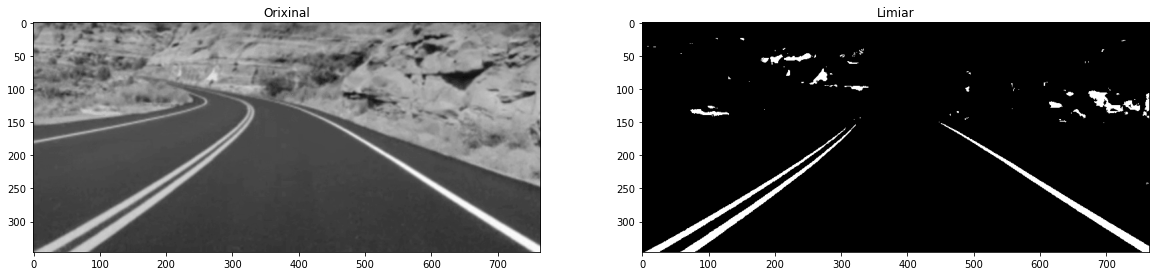

In [2]:
import cv2 as cv
import time
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

# 1. Limiar global emprando lazos

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

a clase, vimos pseudo código de como realizar o limar con distintas opcións. Imos facer un código para replicar estes limiares empregando lazos de python.

Escribimos unha función que contén o código para limiar. A función ten tres argumentos de entrada e unha saída: imaxe limiar.

Tamén calculamos o tempo que leva a operación de limiar.



Tempo investido = 0.5926978588104248 segundos


/home/lkipo/.virtualenvs/VAA/lib64/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/lkipo/.virtualenvs/VAA/lib64/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


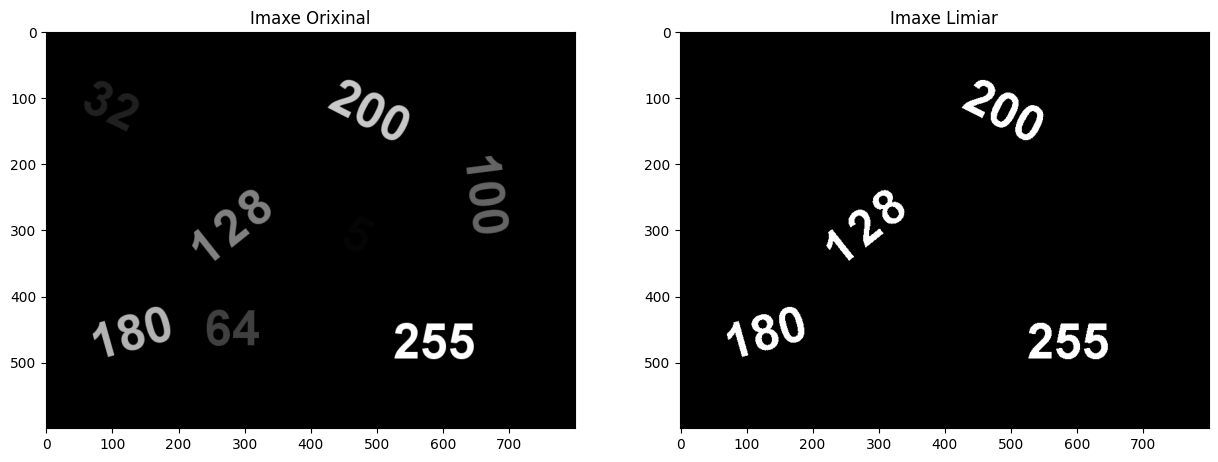

In [3]:
def thresholdUsingLoop(src, thresh, maxValue):
    # creamos a imaxe 
    dst = src.copy()
    height,width = src.shape[:2]

    # lazo sebre filas
    for i in range(height):
        # lazo sobre columnas
        for j in range(width):
            if src[i,j] > thresh:
                dst[i,j] = maxValue
            else:
                dst[i,j] = 0
                
    return dst



#cargamos a imaxe de entrada
src = cv.imread("./data/threshold.png", cv.IMREAD_GRAYSCALE)

# Establecemos o limiar e o valorMaximo para binarizar
thresh = 100
maxValue = 255

t = time.time()
dst = thresholdUsingLoop(src, thresh, maxValue)
print("Tempo investido = {} segundos".format(time.time() - t))

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(src);plt.title("Imaxe Orixinal");
plt.subplot(122);plt.imshow(dst);plt.title("Imaxe Limiar");

Podemos ver que a saída é a esperada. Pero o tempo que leva a operación é alto. Non debería levar ~ 1 segundo realizar unha operación tan sinxela nunha imaxe.

Veremos como mellorar o tempo de execución na seguinte unidade usando operacións numpy. 


# <font style = "color: rgb (50,120,229)"> 2.Limiar mediante operacións vectorizadas </font>
Na cela anterior, vimos que a operación de limiar tardou moito en executarse. Isto débese a que estabamos empregando bucles, que é un xeito moi pouco eficiente de manexar matrices en python.

Para facer o código máis eficiente, debemos empregar un cálculo vectorizado dispoñible en numpy. En concreto, podemos comparar toda a imaxe co limiar en lugar de comparar cada píxel, grazas a Numpy. Lea sobre [**programación en numpy**](https://realpython.com/numpy-array-programming/).


Tempo investido = 0.0005311965942382812 segundos


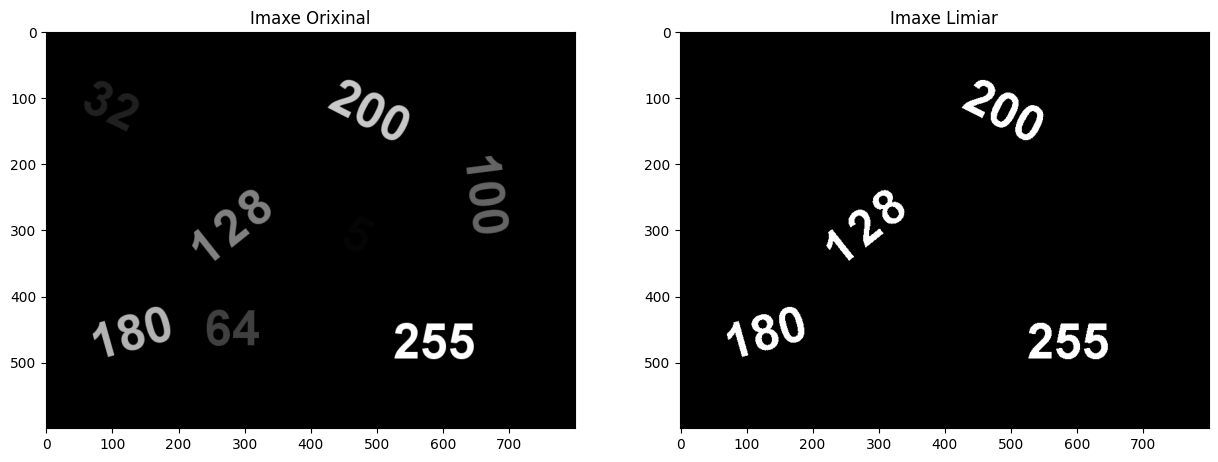

In [4]:
def thresholdUsingVectors(src, thresh, maxValue):
    # Creamos unha imaxe nula
    dst = np.zeros_like(src)
    
    # Atopamos os pixel con valor>threshold que o valor do limiar
    thresholdedPixels = src>thresh
    
    # Asignamos todos eses pixel ao valor desexado: maxValue
    dst[thresholdedPixels] = maxValue
    
    return dst

t = time.time()
dst = thresholdUsingVectors(src, thresh, maxValue)
print("Tempo investido = {} segundos".format(time.time() - t))

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(src);plt.title("Imaxe Orixinal");
plt.subplot(122);plt.imshow(dst);plt.title("Imaxe Limiar");

Como podes ver, o código é moito máis curto e é moito máis eficaz que o que se usa lazos.

O mellor te estás preguntando se tess que escribir todos os algoritmos desde cero? A resposta é "NON". Para a maioría dos algoritmos estándar, OpenCV tenos implementados dun xeito moi optimizado para poder usalos nos nosos proxectos. O limiar é un destes exemplos onde podemos simplemente usar unha función OpenCV e non preocuparnos pola corrección e eficiencia da implementación. Veremos como facelo nas celas de máis abaixo. 

# <font style = "color: rgb (50,120,229)"> 3.Limiar usando a función OpenCV </font>
Discutimos sobre o uso de lazos e operacións vectoriais para realizar limiares nas celas anteriores. Vexamos como podemos usar a función OpenCV `cv.threshold` para realizar limiares e entón tamén discutiremos se debemos usar funcións OpenCV ou escribir as nosas propias funcións.

# 3.1. Limiar global

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

As imaxes binarias úsanse intensivamente en aplicacións de visión artificial, xa que permiten procesar selectivamente rexións específicas dunha imaxe, mantendo intactas as outras rexións. O limiar de imaxes emprégase para crear imaxes binarias a partir de imaxes en escala de grises. Podes usar limiares diferentes para crear imaxes binarias diferentes a partir da orixinal coa función **`threshold ()`**.

### <font color = "green"> Sintaxe da función </font>


``` python
retval, dst = cv.threshold(src, thresh, maxval, type[, dst])
```

`dst`: a matriz de saída do mesmo tamaño, tipo e número de canles que `src`.

A función ten **4 argumentos necesarios**:

1. `src`: matriz de entrada (punto flotante de varias canles, 8 ou 32 bits).
2. `thresh`: valor limiar.
3. `maxval`: valor máximo para usar cos tipos de limiar THRESH_BINARY e THRESH_BINARY_INV.
4. `type`: tipo de limiar (ver ThresholdTypes).



### <font style="color:rgb(8,133,37)">Documentación de OpenCV</font>

[**`threshold()`**](https://docs.opencv.org/4.5.2/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57)
[**`threshold tutorial`**](https://docs.opencv.org/4.5.2/d7/d4d/tutorial_py_thresholding.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Tempo investido = 0.0018739700317382812 segundos


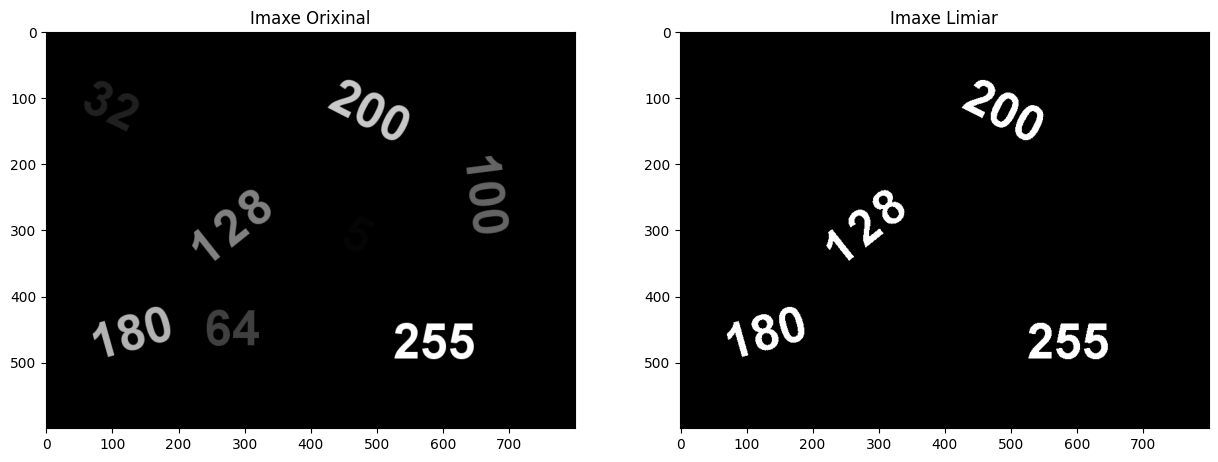

In [5]:
t = time.time()
th, dst = cv.threshold(src, thresh, maxValue, cv.THRESH_BINARY)
print("Tempo investido = {} segundos".format(time.time() - t))


plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(src);plt.title("Imaxe Orixinal");
plt.subplot(122);plt.imshow(dst);plt.title("Imaxe Limiar");


## <font style="color:rgb(50,120,229)">3.2. Comparación dos tempos de execución para a función OpenCV fronte á nosa implementación </font>
Comparemos as tres implementacións que comentamos ata agora para limitar a operación con respecto ao tempo de execución. 

In [6]:
time_opencv = 0
time_loops = 0
time_vector = 0
n_samples = 10
for i in range(n_samples):
    
    t = time.time()
    dst = thresholdUsingLoop(src, thresh, maxValue)
    time_loops += time.time() - t
    
    t = time.time()
    dst = thresholdUsingVectors(src, thresh, maxValue)
    time_vector += time.time() - t
    
    t = time.time()
    th, dst = cv.threshold(src, thresh, maxValue, cv.THRESH_BINARY)
    time_opencv += time.time() - t

print("Tempo promedio empleado pola rutina de lazos = {} s".format(time_loops/n_samples))
print("Tempo promedio empleado pola rutina de vectoriazacion = {} s".format(time_vector/n_samples))
print("Tempo promedio empleado pola rutina de OpenCV = {} s".format(time_opencv/n_samples))

Tempo promedio empleado pola rutina de lazos = 0.5893252849578857 s
Tempo promedio empleado pola rutina de vectoriazacion = 0.00021505355834960938 s
Tempo promedio empleado pola rutina de OpenCV = 9.644031524658203e-05 s


Claramente, podemos ver que o código vectorizado é moito mellor que o código que usa lazos.

A función OpenCV é aínda máis rápida que a que escribimos usando Numpy.

Isto débese a que escribiron código altamente optimizado e fixeron novas optimizacións baseadas na arquitectura do sistema e no sistema operativo que está a usar. É moi recomendable usar funcións OpenCV en lugar de escribir o seu propio algoritmo desde cero se xa está dispoñible en OpenCV (salvo por motivos de investigación ou aprendizaxe). 

## <font style="color:rgb(250,0,0)">AVISO </font>
#### <font style="color:rgb(200,0,0)">Nunca empregues lazo en Python salvo que sexa estritamente necesario</font>

# <font style = "color: rgb (50,120,229)"> 3.3 Outros tipos de limiar </font>
Xa falamos do pseudo código dos outros algoritmos de limiar no vídeo. Nesta unidade, discutiremos brevemente sobre como usar o código para os outros tipos de limiares. 

In [7]:
thresh = 100
maxValue = 150

## <font style="color:rgb(50,120,229)">Limiar Binario </font>

In [8]:
th, dst_bin = cv.threshold(src, thresh, maxValue, cv.THRESH_BINARY)

## <font style="color:rgb(50,120,229)">Limiar Binario Inverso </font>

In [9]:
th, dst_bin_inv = cv.threshold(src, thresh, maxValue, cv.THRESH_BINARY_INV)

## <font style="color:rgb(50,120,229)">Limiar Truncado </font>

In [10]:
th, dst_trunc = cv.threshold(src, thresh, maxValue, cv.THRESH_TRUNC)

## <font style="color:rgb(50,120,229)">Limiar a cero</font>

In [11]:
th, dst_to_zero = cv.threshold(src, thresh, maxValue, cv.THRESH_TOZERO)

## <font style="color:rgb(50,120,229)">Limiar a cero invertido</font>

In [12]:
th, dst_to_zero_inv = cv.threshold(src, thresh, maxValue, cv.THRESH_TOZERO_INV)

## <font style="color:rgb(50,120,229)">Visualiza e compara </font>

Valor do limiar = 100, Max = 150


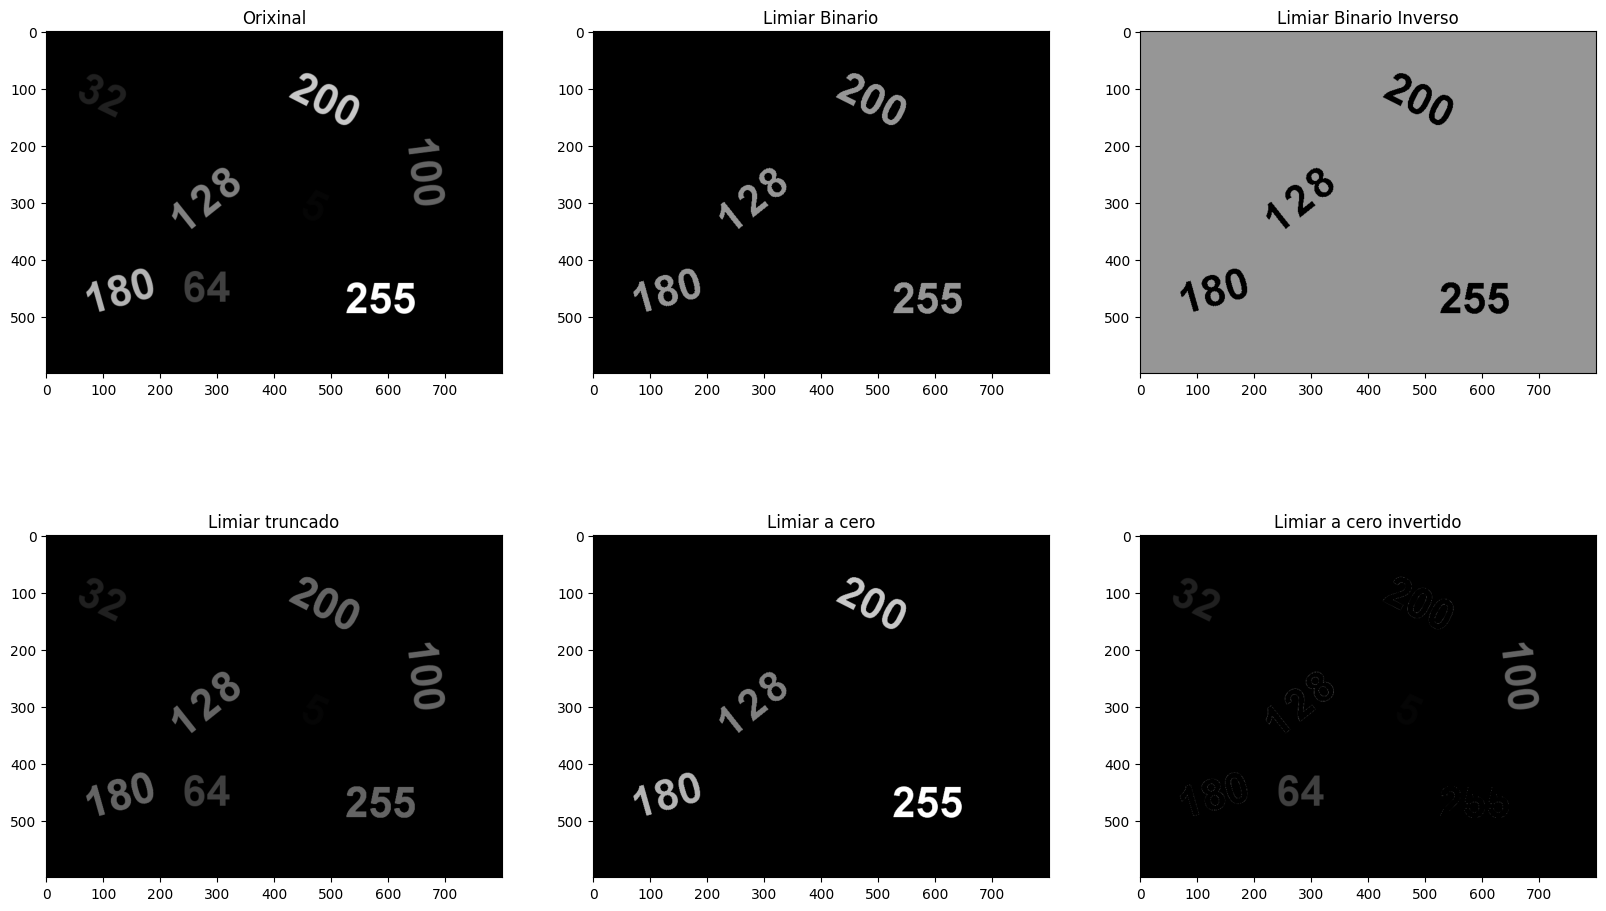

In [13]:
print("Valor do limiar = {}, Max = {}".format(thresh, maxValue))
plt.figure(figsize=[20,12])
plt.subplot(231);plt.imshow(src, cmap='gray', vmin=0, vmax=255);plt.title("Orixinal");
plt.subplot(232);plt.imshow(dst_bin, cmap='gray', vmin=0, vmax=255);plt.title("Limiar Binario");
plt.subplot(233);plt.imshow(dst_bin_inv, cmap='gray', vmin=0, vmax=255);plt.title("Limiar Binario Inverso");
plt.subplot(234);plt.imshow(dst_trunc, cmap='gray', vmin=0, vmax=255);plt.title("Limiar truncado");
plt.subplot(235);plt.imshow(dst_to_zero, cmap='gray', vmin=0, vmax=255);plt.title("Limiar a cero");
plt.subplot(236);plt.imshow(dst_to_zero_inv, cmap='gray', vmin=0, vmax=255);plt.title("Limiar a cero invertido");

## <font style="color:rgb(50,120,229)">3.5. Limiar en presenza de ruído </font>
Hai dous métodos máis en OpenCV que manexan a presenza de Ruído mentres se fan limiares. Eles son :
1. Limiar adaptativo
1. Limiar de Otsu

O limiar de Otsu o abordaremos noutros cadernos deste tema unha vez que manexemos histogramas (tamén conceptos de ruído de imaxe e desenfoque) para comprender os aspectos únicos desta técnica.

Para profundizar sobre as técnicas limiar, [mira este titorial](https://docs.opencv.org/4.1.0/d7/d4d/tutorial_py_thresholding.html).

## <font style="color:rgb(50,120,230)">Exemplo de detección de liñas de carretera</font>

Text(0.5, 1.0, 'Limiar')

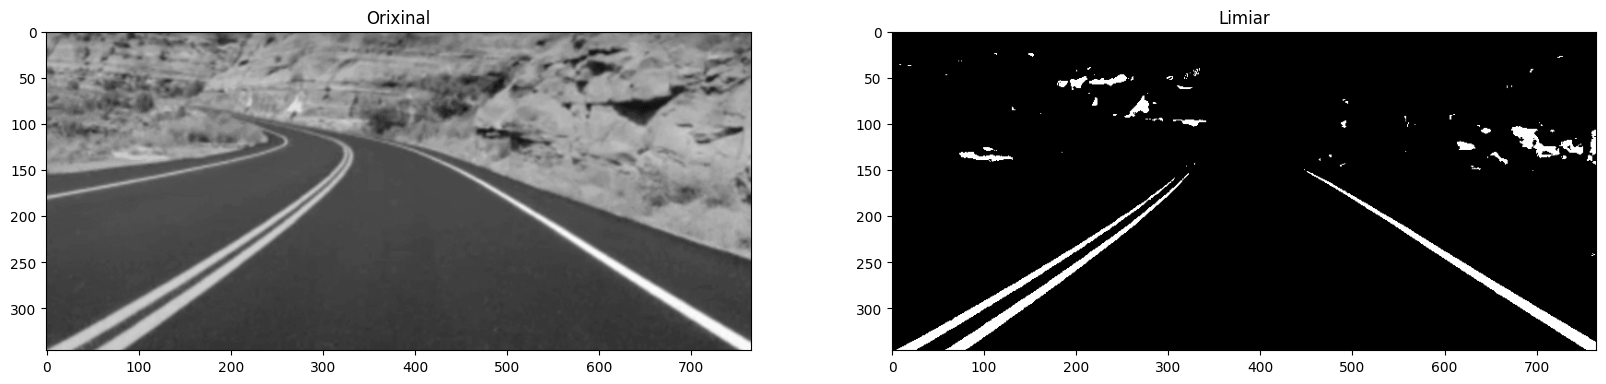

In [14]:
# Lemos a imaxe en escala de grises.
img = cv.imread('./data/road_lanes.png', cv.IMREAD_GRAYSCALE)

# Realizamos a umbralización binaria.
retval, img_thresh = cv.threshold(img, 165, 255, cv.THRESH_BINARY)

# Visualizamos
plt.figure(figsize = [20, 8])
plt.subplot(121); plt.imshow(img); plt.title('Orixinal')
plt.subplot(122); plt.imshow(img_thresh); plt.title('Limiar')

# 4. Limiar adaptativo
Supoñamos que queremos crear unha aplicación que puidese ler (decodificar) partituras. Isto é similar a
Recoñecemento óptico de caracteres (OCR) para documentos de texto onde o obxectivo é recoñecer caracteres de texto. En calquera das aplicacións, un dos primeiros pasos na secuencia de procesamento é illar a información importante na imaxe dun documento (separándoa do fondo). Esta tarefa pódese realizar con técnicas de limiar. Vexamos un exemplo. 

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Sintaxe da función </font>

``` python
dst = cv.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst])
```

`dst` Imaxe de destino do mesmo tamaño e do mesmo tipo que src.

A función ten ** 6 argumentos necesarios **:
1. `src`: imaxe de canle orixinal de 8 bits.

2. `maxValue`: valor diferente de cero asignado aos píxeles para os que se cumpre a condición
3. `adaptiveMethod`: algoritmo de limiar adaptativo usado, consulta AdaptiveThresholdTypes. O BORDER_REPLICATE | BORDER_ISOLATED úsase para procesar bordes.
4. `thresholdType:` Tipo de limiar que debe ser THRESH_BINARY ou THRESH_BINARY_INV, consulte ThresholdTypes.
5. `blockSize`: tamaño da vecindade en torno do pixel que se usa para calcular un valor limiar: 3, 5, 7, etc.
6. `C`: constante que se restará da media ou media ponderada (ver os detalles a continuación). Normalmente, é positivo pero tamén pode ser cero ou negativo.



### <font style="color:rgb(8,133,37)">Documentación de OpenCV</font>

[**`adaptiveThreshold()`**](https://docs.opencv.org/4.5.2/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3)
[**`threshold tutorial`**](https://docs.opencv.org/4.5.2/d7/d4d/tutorial_py_thresholding.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">4.1 Exemplo: Lector de partituras</font>

Text(0.5, 1.0, 'Limiar (adaptativo)')

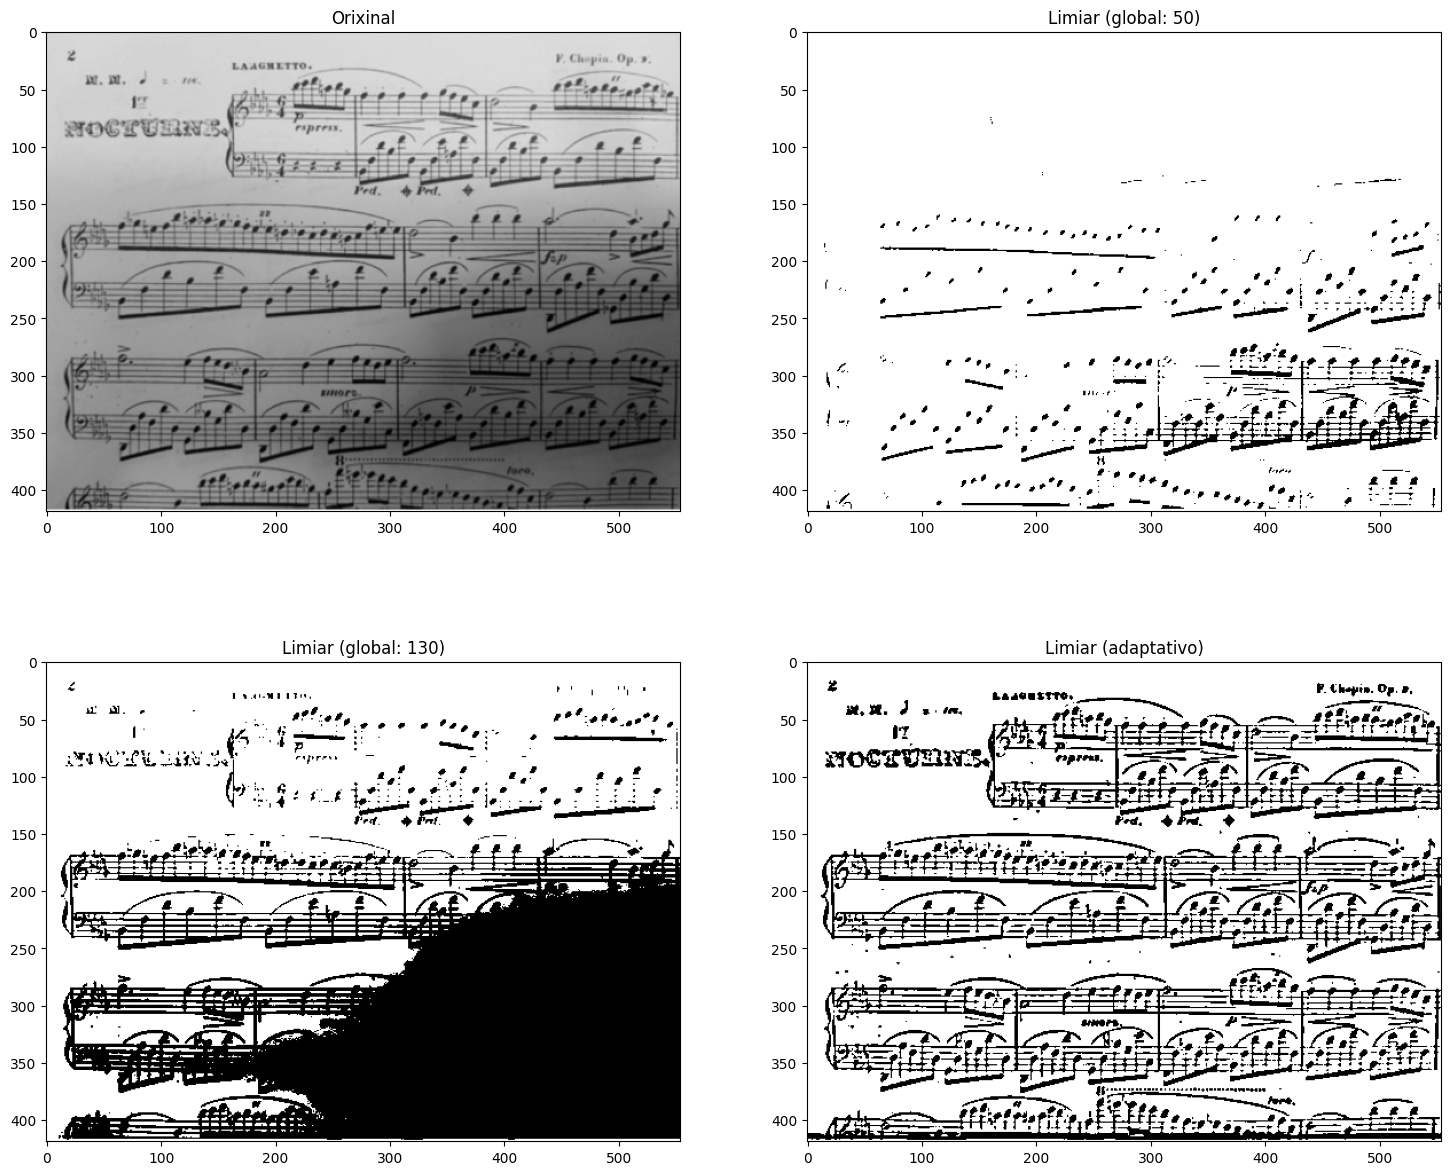

In [15]:
# Lemos as imaxes
img = cv.imread('./data/Piano_Sheet_Music.png', cv.IMREAD_GRAYSCALE)

# Limiar.
retval, img_thresh_gbl_1 = cv.threshold(img, 50, 255, cv.THRESH_BINARY)

# Limiar global
retval, img_thresh_gbl_2 = cv.threshold(img, 130, 255, cv.THRESH_BINARY)

# Umbralización adaptativa.
img_thresh_adp = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 13, 7)

# Visualizamos.
plt.figure(figsize = [18, 15])
plt.subplot(221); plt.imshow(img);              plt.title('Orixinal')
plt.subplot(222); plt.imshow(img_thresh_gbl_1); plt.title('Limiar (global: 50)')
plt.subplot(223); plt.imshow(img_thresh_gbl_2); plt.title('Limiar (global: 130)')
plt.subplot(224); plt.imshow(img_thresh_adp);   plt.title('Limiar (adaptativo)')

# 5. Exercicio
Completa o código na cela inferior.

In [7]:
img = cv.imread('./data/Sheet_Music_Test-1.jpg', cv.IMREAD_GRAYSCALE)

# Executa un limiar global (atopa o mellor limiar que aille as notas das sombras).
# Usa threshold: cv.THRESH_BINARY_INV
# O teu código
# retval, img_thresh = 

# Visualiza.
# DESCOMENTA AS LIÑAS DE ABAIXO.
# plt.figure(figsize = [18,15])
# plt.subplot(121); plt.imshow(img);        plt.title('Orixinal')
# plt.subplot(122); plt.imshow(img_thresh); plt.title('Limiar(global)')